In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
PATH_DATA = 'other/'

In [4]:
df_prod = pd.read_csv(PATH_DATA + 'amazon_product.csv')
df_rev = pd.read_csv(PATH_DATA + 'amazon_review.csv')

In [5]:
df_prod

,Tuple ID,PID,Category,Price,Brand,Color,Quality
0,p1,1,Laptop,999.00,Vaio,Silver,0.70
1,p2,2,Laptop,529.00,Asus,Black,0.65
2,p3,3,Laptop,599.00,HP,Silver,0.50
3,p4,4,DSLR Camera,549.00,Canon,Black,0.75
4,p5,5,Sci Fi eBooks,15.99,Fantasy Press,Blue,0.40


In [15]:
# kayvon code
# Want to get the tuple desired and output it with grounded causal graph

row_index = 0  # the index of the row you want to extract
row_as_dataframe = df_prod.iloc[row_index:row_index+1] #could be changed for a slice of rows
row_as_dataframe
#tuple1 = row_as_dataframe.iloc[:, 1:] #used to get rid of first column
#print(tuple1)

,Tuple ID,PID,Category,Price,Brand,Color,Quality
0,p1,1,Laptop,999.0,Vaio,Silver,0.7


In [9]:
# df_prod.to_html()
# print(df_prod.style)

# style1 = df_prod.style
# style1.export()

In [10]:
df_rev.head()

,Tuple ID,PID,ReviewID,Sentiment,Rating
0,r1,1,1,-0.95,2
1,r2,2,2,0.70,4
2,r3,2,3,-0.20,1
3,r4,3,3,0.23,3
4,r5,3,5,0.95,5


In [11]:
df_rel = df_prod.merge(df_rev, how='inner', on='PID')
df_rel

,Tuple ID_x,PID,Category,Price,Brand,Color,Quality,Tuple ID_y,ReviewID,Sentiment,Rating
0,p1,1,Laptop,999.0,Vaio,Silver,0.70,r1,1,-0.95,2
1,p2,2,Laptop,529.0,Asus,Black,0.65,r2,2,0.70,4
2,p2,2,Laptop,529.0,Asus,Black,0.65,r3,3,-0.20,1
3,p3,3,Laptop,599.0,HP,Silver,0.50,r4,3,0.23,3
4,p3,3,Laptop,599.0,HP,Silver,0.50,r5,5,0.95,5
5,p4,4,DSLR Camera,549.0,Canon,Black,0.75,r6,5,0.70,4


In [40]:
df_rel.groupby(['PID', 'Category', 'Price', 'Brand', 'Color']).mean().rename(
    columns={"Sentiment": "Senti", "Rating": "Rtng"}).reset_index()

,PID,Category,Price,Brand,Color,Quality,ReviewID,Senti,Rtng
0,1,Laptop,999.0,Vaio,Silver,0.70,1.0,-0.95,2.0
1,2,Laptop,529.0,Asus,Black,0.65,2.5,0.25,2.5
2,3,Laptop,599.0,HP,Silver,0.50,4.0,0.59,4.0
3,4,DSLR Camera,549.0,Canon,Black,0.75,5.0,0.70,4.0


In [12]:
rv = df_rel.groupby(['PID', 'Category', 'Price', 'Brand', 'Color']).mean().rename(
    columns={"Sentiment": "Senti", "Rating": "Rtng"}).reset_index()
rv.drop(labels=['ReviewID'], axis=1)

,PID,Category,Price,Brand,Color,Quality,Senti,Rtng
0,1,Laptop,999.0,Vaio,Silver,0.70,-0.95,2.0
1,2,Laptop,529.0,Asus,Black,0.65,0.25,2.5
2,3,Laptop,599.0,HP,Silver,0.50,0.59,4.0
3,4,DSLR Camera,549.0,Canon,Black,0.75,0.70,4.0


In [42]:
mystr = rv.to_html()
with open('rel_view.html', 'w') as f:
    f.write(mystr)

In [13]:
df_plot1 = pd.read_csv(PATH_DATA + 'amazon3.csv')
df_plot1

,Tuple ID,Rtng,Type,Category
0,t1,5.0,PRE,Tablet
1,t1,4.5,POST,Tablet
2,t1,4.0,PRE,Tablet
3,t1,3.8,POST,Tablet
4,t1,4.9,PRE,Headphone
5,t1,5.0,POST,Headphone
6,t1,5.0,PRE,Headphone
7,t1,3.0,POST,Headphone
8,t1,4.0,PRE,Laptop
9,t1,4.6,POST,Laptop


In [14]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

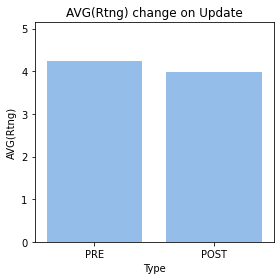

In [48]:
plt.figure(figsize=(4,4))
ax = sns.barplot(x="Type", y="Rtng", #palette=['#b5d4f5','#86bdf7'],
                 color = '#86bdf7',
                 data=df_plot1,
                 errwidth=0).set(title='AVG(Rtng) change on Update')
# ax.set(xlabel='AVG(Rtng)', ylabel='Type')
plt.ylabel('AVG(Rtng)')
plt.xlabel("Type")
out_filename = 'bar_graph1_new.jpg'
plt.tight_layout()
plt.savefig(out_filename, dpi=500)
plt.draw()

In [16]:
df_plot1

,Tuple ID,Rtng,Type,Category
0,t1,5.0,PRE,Tablet
1,t1,4.5,POST,Tablet
2,t1,4.0,PRE,Tablet
3,t1,3.8,POST,Tablet
4,t1,4.9,PRE,Headphone
5,t1,5.0,POST,Headphone
6,t1,5.0,PRE,Headphone
7,t1,3.0,POST,Headphone
8,t1,4.0,PRE,Laptop
9,t1,4.6,POST,Laptop


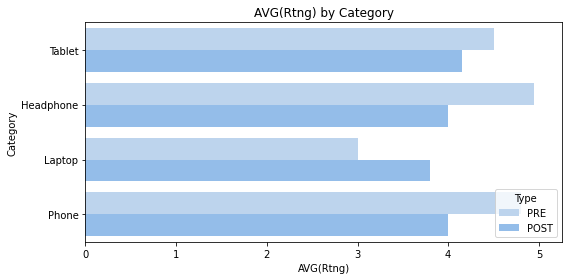

In [44]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Rtng", y="Category", hue='Type',
                 data=df_plot1[df_plot1['Category'].isin(['Laptop', 'Phone', 'Tablet', 'Headphone'])],
                 #color = "#86bdf7", 
                 palette=['#b5d4f5','#86bdf7'],
                 errwidth=0).set(title='AVG(Rtng) by Category')
plt.xlabel('AVG(Rtng)')
# plt.xlabel("Type")
out_filename = 'bar_graph2_new.jpg'
plt.tight_layout()
plt.savefig(out_filename, dpi=500)
plt.draw()

In [19]:
df = df_plot1[df_plot1['Type'] == 'PRE']
print(df)

   Tuple ID  Rtng Type   Category
0        t1   5.0  PRE     Tablet
2        t1   4.0  PRE     Tablet
4        t1   4.9  PRE  Headphone
6        t1   5.0  PRE  Headphone
8        t1   4.0  PRE     Laptop
10       t1   2.0  PRE     Laptop
12       t1   4.8  PRE      Phone


[Text(0.5, 1.0, 'AVG(Rtng) by Category')]

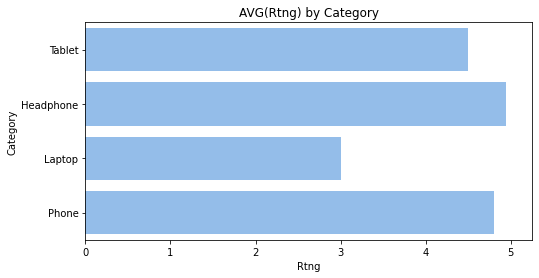

In [37]:
plt.figure(figsize=(8,4))
sns.barplot(x="Rtng", y="Category",data=df, color = '#86bdf7', errwidth=0).set(title='AVG(Rtng) by Category')

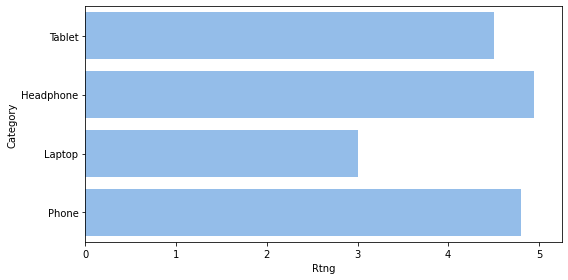

In [41]:
#plt.plot()
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Rtng", y="Category",
                 data=df,
                 color = '#86bdf7',
                 #palette="Blues", 
                 errwidth=0)
                 #.set(title='AVG(Rtng) by Category')
                
fig = ax.get_figure()
fig.tight_layout()
fig.savefig(PATH_DATA + '/agg_query_bar_graph_new.jpg', dpi=500)

In [ ]:
d2 = {
    'Price': np.linspace(0.1, 1, num=10).tolist() + np.linspace(1, 10, num=10).tolist(),
    'AVG(Rtng)': list(map(lambda x: x**2, np.linspace(0.1, 1, num=10))) +\
                 list(map(lambda x: x**0.5, np.linspace(1, 9, num=10)))
    
}
d2['AVG(Rtng)'] = np.array(d2['AVG(Rtng)']) + 0.06*np.random.randn(len(d2['Price']))
d2['AVG(Rtng)'] = d2['AVG(Rtng)']*-1 + 5

df_plot2 = pd.DataFrame(data=d2)
df_plot2

,Price,AVG(Rtng)
0,0.1,4.961294
1,0.2,4.988548
2,0.3,4.897345
3,0.4,4.754426
4,0.5,4.704388
5,0.6,4.551774
6,0.7,4.473944
7,0.8,4.364749
8,0.9,4.387848
9,1.0,4.038024


In [2]:
score_ls = [[450.0, 3.4377540356840086], [461.1111111111111, 3.4377540356840086], [472.22222222222223, 3.4377540356840086], [483.3333333333333, 3.4377540356840086], [494.44444444444446, 3.4377540356840086], [505.55555555555554, 3.4377540356840086], [516.6666666666666, 3.4377540356840086], [527.7777777777778, 3.4377540356840086], [538.8888888888889, 3.4377540356840086], [550.0, 3.4377540356840086]]


In [4]:
df_graph = pd.DataFrame(data=score_ls)

In [5]:
df_graph

,0,1
0,450.000000,3.437754
1,461.111111,3.437754
2,472.222222,3.437754
3,483.333333,3.437754
4,494.444444,3.437754
5,505.555556,3.437754
6,516.666667,3.437754
7,527.777778,3.437754
8,538.888889,3.437754
9,550.000000,3.437754


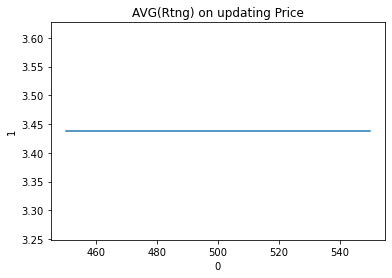

In [9]:
ax = sns.lineplot(data=df_graph, x=0,y=1, palette='Set2').set(title='AVG(Rtng) on updating Price')

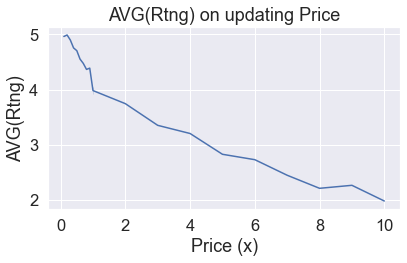

In [ ]:
ax = sns.lineplot(data=df_plot2, x="Price", y="AVG(Rtng)", palette='Set2').set(title='AVG(Rtng) on updating Price')
out_filename = 'line_graph1.jpg'
plt.xlabel('Price (x)')
plt.tight_layout()
plt.savefig(out_filename, dpi=500)
plt.draw()

# How to options

[Price: 1.1x, Color: Red]

[Price: 1.3x, Color: Silver]

[Price: 200+, Color: Red]

[Price: 1.5x, Color: No Change]

[Price: 350+, Color: Silver]

In [ ]:
sns.__version__

'0.11.2'

In [1]:
# Network X graph

import networkx as nx

In [7]:
import matplotlib.pyplot as plt

In [2]:
# Declare directed graph
G = nx.DiGraph()

nodes = ['Quality[p1]', 'Brand[p1]', 'Category[p1]', 'Sentiment[p1]', 'Rating[p1]', 'Color[p1]', 'Price[p1]']
nodes += ['Quality[p2]', 'Brand[p2]', 'Category[p2]', 'Sentiment[p2]', 'Rating[p2]', 'Color[p2]', 'Price[p2]']

edges = [
    ('Quality[p1]','Price[p1]'), ('Quality[p1]','Rating[p1]'), ('Quality[p1]','Sentiment[p1]'),
    ('Brand[p1]','Quality[p1]'), ('Brand[p1]','Price[p1]'), ('Brand[p1]','Color[p1]'), ('Brand[p1]','Rating[p1]'), ('Brand[p1]','Sentiment[p1]'), ('Brand[p1]','Category[p1]'),
    ('Category[p1]','Sentiment[p1]'), ('Category[p1]','Rating[p1]'),
    ('Sentiment[p1]','Rating[p1]'),
    ('Color[p1]','Rating[p1]'),
    ('Price[p1]','Rating[p1]'),
    
    ('Quality[p2]','Price[p2]'), ('Quality[p2]','Rating[p2]'), ('Quality[p2]','Sentiment[p2]'),
    ('Brand[p2]','Quality[p2]'), ('Brand[p2]','Price[p2]'), ('Brand[p2]','Color[p2]'), ('Brand[p2]','Rating[p2]'), ('Brand[p2]','Sentiment[p2]'), ('Brand[p2]','Category[p2]'),
    ('Category[p2]','Sentiment[p2]'), ('Category[p2]','Rating[p2]'),
    ('Sentiment[p2]','Rating[p2]'),
    ('Color[p2]','Rating[p2]'),
    ('Price[p2]','Rating[p2]'),
    
    ('Price[p1]','Rating[p2]'), ('Price[p2]','Rating[p1]'),
    ('Quality[p1]','Rating[p2]'), ('Quality[p2]','Rating[p1]'),
]

# Add node or edge to networkx graph
for n in nodes:
    G.add_node(n)
for e in edges:
    source, target = e
    G.add_edge(source, target)

In [ ]:
[0.30, -0.15]*(len(nodes)//2)

[0.3,
 -0.15,
 0.3,
 -0.15,
 0.3,
 -0.15,
 0.3,
 -0.15,
 0.3,
 -0.15,
 0.3,
 -0.15,
 0.3,
 -0.15]

In [3]:
q1 = nodes.index('Quality[p1]')

In [4]:
q1 = nodes.index('Quality[p1]')
q2 = nodes.index('Quality[p2]')
r1 = nodes.index('Rating[p1]')
r2 = nodes.index('Rating[p2]')
s1 = nodes.index('Sentiment[p1]')
s2 = nodes.index('Sentiment[p2]')

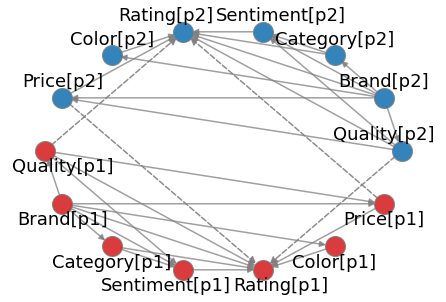

In [8]:
pos = nx.layout.shell_layout(G)
for k,v in pos.items():
    pos[k] = v * [1,1]

pos_lab = {}
# lab_off = [0.20, -0.15]*(len(nodes)//2)
lab_off_vert = [-0.13]*(len(nodes)//2) + [0.13]*(len(nodes)//2)
lab_off_hor = [0]*(len(nodes))
lab_off_hor[q1] = 0.1
lab_off_hor[q2] = -0.1
lab_off_hor[r1] = 0.1
lab_off_hor[r2] = -0.1
lab_off_hor[s1] = -0.1
lab_off_hor[s2] = 0.1



for i,t in enumerate(pos.items()):
    k,v = t
    pos_lab[k] = v + [lab_off_hor[i],lab_off_vert[i]]



options = {"edgecolors": "tab:gray", "node_size": 400, "alpha": 0.9}

nx.draw_networkx_nodes(
    G, pos,
    nodelist=nodes[:len(nodes)//2],
    node_color="tab:red", **options)

nx.draw_networkx_nodes(
    G, pos,
    nodelist=nodes[len(nodes)//2:],
    node_color="tab:blue", **options)

nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edges[:-4],
    style='solid',
    width=1.5,
    alpha=0.75,
    edge_color="tab:gray",
    arrowstyle="-|>",
    arrowsize=12)

nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edges[-4:],
    style='dashed',
    width=1.5,
    alpha=0.9,
    edge_color="tab:gray",
    arrowstyle="-|>",
    arrowsize=15)

labels = nx.draw_networkx_labels(
    G, pos_lab,
    font_size=18)

# fig = plt.figure(figsize=(2,2))
out_filename = 'causal_graph_new.jpg'
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig(out_filename, dpi=500)
plt.draw()

In [ ]:
xt

NameError: name 'xt' is not defined

In [ ]:
pos

In [ ]:
pos

In [ ]:
xx = np.array([1,1.4])

In [ ]:
xx * [1,2]

In [ ]:
pos

In [ ]:
pos2 = {}
for k,v in pos.items():
    pos2[k] = v + [0,0.1]
pos2

In [ ]:
xx = np.array([0,1])

In [ ]:
xx

In [ ]:
pos['Price[p2]']+[0,1]

In [ ]:
G = nx.petersen_graph()
G.edges